<center> <span style="color:#0F3460;font-size:30px; font-weight: bold; padding:250px ;">Elevator Predictive Maintenance</span> </center>

<span> <center>Datasets:https://www.kaggle.com/datasets/shivamb/elevator-predictive-maintenance-dataset </center></span>

<center><span style="color:#0F3460;font-size:21px; font-weight: bold;">


<span style="color:#0F3460;font-size:21px; font-weight: bold;">1.1 Importing libaries </span>

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np

<hr>

  <center><span style="color:#0F3460;font-size:30px; font-weight: bold;">Part 1</span> </center> <br>
  
  <center><span style="color:#0F3460;font-size:23px; font-weight: bold;">Data Preprocessing</span>  </center>

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.2 Importing My Data From *csv* File</span>

In [35]:
epm = pd.read_csv("predictive-maintenance-dataset.csv")

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.3 Top 5 Rows</span>

In [36]:
epm.head()

,ID,revolutions,humidity,vibration,x1,x2,x3,x4,x5
0,1,93.744,73.999,18.0,167.743,19.745,1.266828,8787.937536,5475.852001
1,2,93.740,73.999,18.0,167.739,19.741,1.266774,8787.187600,5475.852001
2,3,93.736,73.998,18.0,167.734,19.738,1.266737,8786.437696,5475.704004
3,4,93.732,73.998,18.0,167.730,19.734,1.266683,8785.687824,5475.704004
4,5,93.729,73.998,18.0,167.727,19.731,1.266642,8785.125441,5475.704004


- ID: Used for tracking and managing records.
- Revolutions: Key feature for assessing wear and predicting when maintenance is needed based on usage.
- Humidity: Helps in understanding environmental factors affecting machinery performance.
- Vibration: Critical for early detection of mechanical issues, allowing for preventive actions.
- x1 to x5: Enhance the model by providing additional context and potentially capturing complex interactions affecting machinery health.



 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.4 Info</span>

In [37]:
epm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112001 entries, 0 to 112000
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           112001 non-null  int64  
 1   revolutions  112001 non-null  float64
 2   humidity     112001 non-null  float64
 3   vibration    109563 non-null  float64
 4   x1           112001 non-null  float64
 5   x2           112001 non-null  float64
 6   x3           112001 non-null  float64
 7   x4           112001 non-null  float64
 8   x5           112001 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 7.7 MB


 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.5 Cleaning</span>

In [38]:
epm_clean = epm.isnull().sum()
epm_clean

ID                0
revolutions       0
humidity          0
vibration      2438
x1                0
x2                0
x3                0
x4                0
x5                0
dtype: int64

In [39]:
epm_clean = epm.dropna()
epm_clean.isnull().sum()

ID             0
revolutions    0
humidity       0
vibration      0
x1             0
x2             0
x3             0
x4             0
x5             0
dtype: int64

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.6 Statistical Summary </span>


In [40]:
epm_clean.describe()

,ID,revolutions,humidity,vibration,x1,x2,x3,x4,x5
count,109563.000000,109563.000000,109563.000000,109563.000000,109563.000000,109563.000000,109563.000000,109563.000000,109563.000000
mean,56054.280962,46.250013,74.216124,28.340276,120.466137,-27.966111,0.623504,2505.025901,5508.504394
std,32493.380259,19.130226,0.686551,24.292500,19.068724,19.216075,0.259938,1884.049342,101.659813
min,1.000000,16.933000,72.399000,2.000000,90.132000,-56.353000,0.231328,286.726489,5241.615201
25%,28023.500000,28.818000,73.908000,8.000000,103.054000,-45.418000,0.388194,830.477125,5462.392464
50%,56114.000000,43.295000,74.207000,21.280000,117.587000,-31.471000,0.580253,1874.457025,5506.678849
75%,84373.500000,64.000000,74.717000,39.210000,138.124000,-10.007000,0.865416,4096.000000,5582.630089
max,112001.000000,93.744000,75.400000,100.000000,167.743000,19.745000,1.266828,8787.937536,5685.160000


 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.7 Relationships between Features</span>


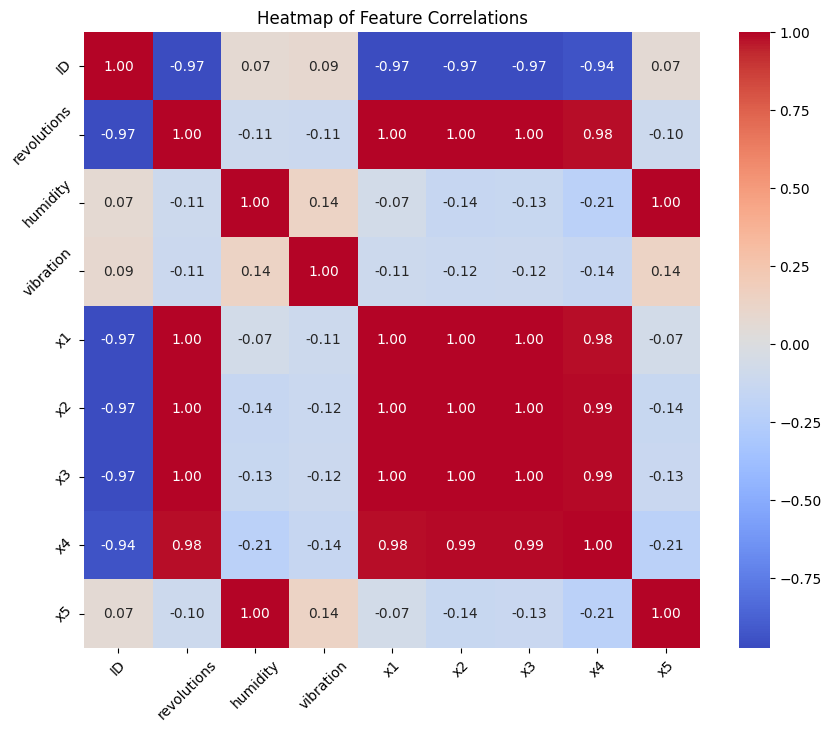

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# emp = pd.read_csv('path_to_your_dataset.csv')

# Calculate the correlation matrix
corr = epm_clean.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjusts the size of the plot
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Customizing the plot
plt.title('Heatmap of Feature Correlations')
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.yticks(rotation=45)  # Rotates the y-axis labels for better readability

# Display the plot
plt.show()

X5 and humidity 
X4, x3, x2, x1 and revolution 

Non of the sensors work good with vibration

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.8 Visualizing Relationships</span>

- revolutions vs x1

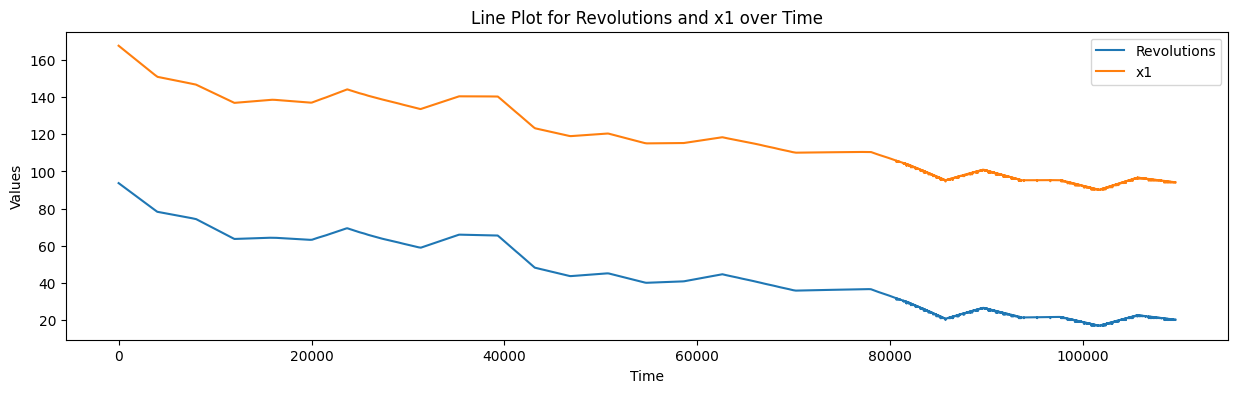

In [42]:
# Prepare data for humidity vs. x5 plot
humidity = epm_clean['humidity']
x5 = epm_clean['x5']
time_humidity = np.arange(len(humidity))

# Create a figure and axis for revolutions vs. x1 plot
plt.figure(figsize=(15, 4))
plt.plot(time_revolutions, revolutions, label='Revolutions')
plt.plot(time_revolutions, x1, label='x1')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Line Plot for Revolutions and x1 over Time')
plt.legend()
plt.show()


- Humidity vs x5

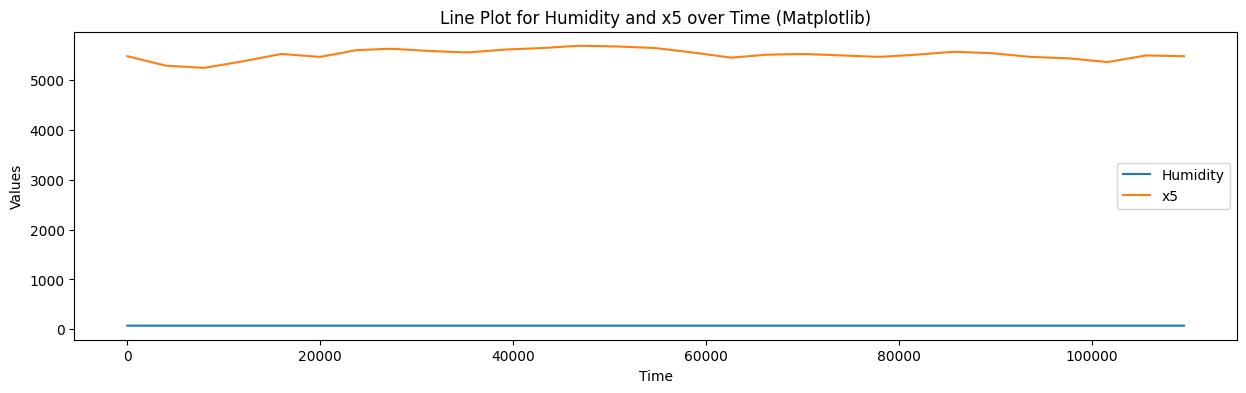

In [43]:
plt.figure(figsize=(15, 4))
plt.plot(time_humidity, humidity, label='Humidity')
plt.plot(time_humidity, x5, label='x5')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Line Plot for Humidity and x5 over Time (Matplotlib)')
plt.legend()
plt.show()

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.8 Function to reshape dataset as required by LSTM</span>

In [44]:
def gen_sequence(epm_clean, seq_length, seq_cols):

    # Ensure only feature columns are used
    data_array = epm_clean[seq_cols].values
    num_elements = data_array.shape[0]

    for start, stop in zip(range(0, num_elements - seq_length + 1), range(seq_length, num_elements + 1)):
          yield data_array[start:stop, :]


In [45]:
# Define sequence length and columns to use
sequence_length = 3
feature_columns = ['revolutions', 'humidity', 'vibration', 'x1', 'x2', 'x3', 'x4', 'x5']

# Generate sequences
sequences = list(gen_sequence(epm_clean, sequence_length, feature_columns))


In [46]:
# Generator for the sequences
seq_gen = (list(gen_sequence(epm_clean[epm_clean['vibration'] == id], sequence_length, feature_columns))
           for id in epm_clean['vibration'].unique())

In [47]:
seq_list = [seq for seq_batch in seq_gen for seq in seq_batch]
seq_array = np.concatenate(seq_list).astype(np.float32)
print(seq_array.shape)

(277710, 8)
